In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings('ignore')

sns.set()

# For better Visualization
%config InlineBacken.figure_format = 'retina'

In [2]:
customer_churn = pd.read_csv('telecom_churn.csv',index_col=0)

In [3]:
customer_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
customer_churn.shape

(7043, 20)

There's a total of 7043 observations and 20 features.

In [5]:
customer_churn.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
customer_churn.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

# Data Preprocessing

In [7]:
# Converting Monthly charges and total charegs to float datatype.

customer_churn['MonthlyCharges'] = customer_churn['MonthlyCharges'].astype('float64')
customer_churn['TotalCharges'] = pd.to_numeric(customer_churn['TotalCharges'],errors='coerce')

In [8]:
# Checking Null values
customer_churn.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
# droping null values
customer_churn.dropna(inplace=True,how='any')

In [10]:
def print_cat_unique(df):
    ''' Prints Unique values of Categorical Columns.'''
    for col in df:
        if df[col].dtypes == 'object':
            print(f'{col} : {df[col].unique()}')

In [11]:
print_cat_unique(customer_churn)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


**No phone service** and **No internet service** is equivalent to **No**. So lets replace them.

In [12]:
customer_churn.replace(['No phone service','No internet service'],'No',inplace=True)

Payment Method has mentioned **automatic** with Credit Card and Bank Transfer. Is there a relation between automatic payment and manual payment? Let extract automatic from it to check it further.

In [13]:
def auto_or_manual(value):
    '''Used to create a column with automatic and manual as values.'''
    val = value.split('(')
    val = val[-1].split(')')
    if val[0] == 'automatic':
        return 'automatic'
    else:
        return 'manual'

customer_churn['Automatic'] = customer_churn['PaymentMethod'].apply(auto_or_manual)

# Descriptive Statistics

In [14]:
customer_churn.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


-> 75% of customers have tenure less than 55 months.

-> Maximum Tenure period was of 72 Months.

-> Average monthly charges is USD 64.76.

-> 25% of customers pay more than USD 89.85 per month.

-> Average total charges is USD 2283.30.

# Univariate Analysis

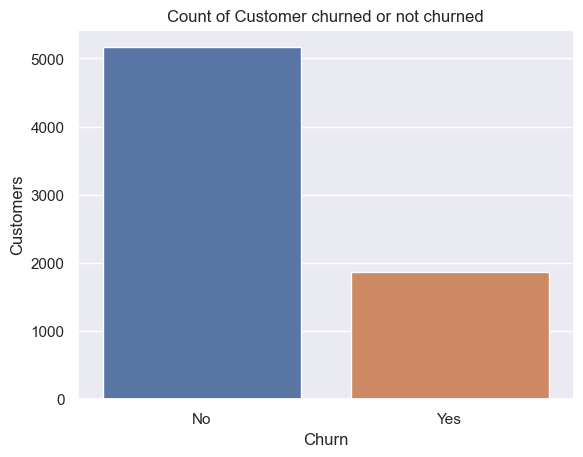

In [15]:
sns.barplot(y =customer_churn['Churn'].value_counts().values,x=customer_churn.Churn.unique())
plt.xlabel('Churn')
plt.ylabel('Customers')
plt.title('Count of Customer churned or not churned')
plt.show()

In [16]:
customer_churn['Churn'].value_counts(normalize=True) * 100

No     73.421502
Yes    26.578498
Name: Churn, dtype: float64

-> The ratio of Yes:No is almost 26.5 : 73.5

-> The data is highly imbalanced.

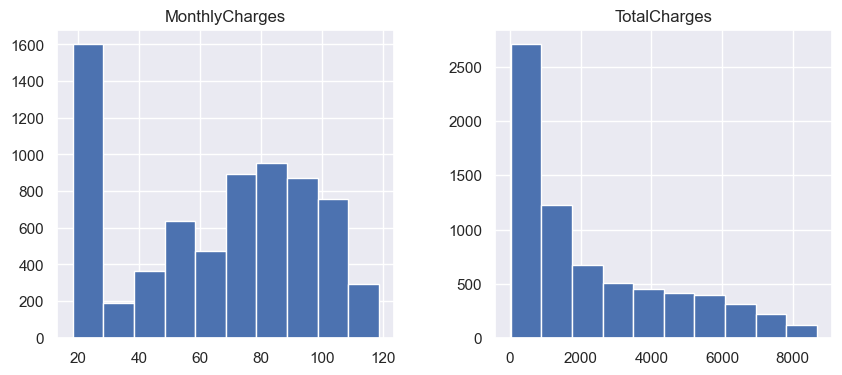

In [17]:
customer_churn[['MonthlyCharges','TotalCharges']].hist(figsize = (10,4), bins=10)
plt.show()

-> Total Charges are right skewed.

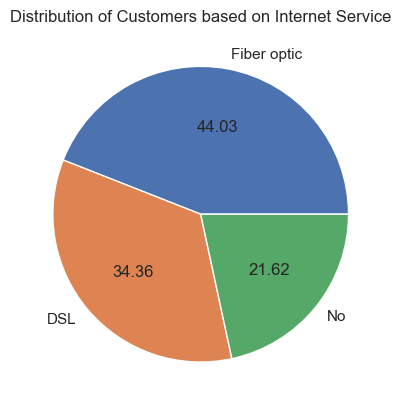

In [18]:
plt.pie(x=customer_churn['InternetService'].value_counts().values,labels=customer_churn['InternetService'].value_counts().index, autopct='%.2f')
plt.title('Distribution of Customers based on Internet Service')
plt.show()

-> Majority of the customers use Fiber Optic Cables.

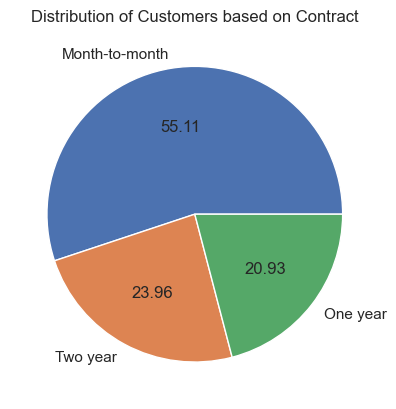

In [19]:
plt.pie(x=customer_churn['Contract'].value_counts().values,labels=customer_churn['Contract'].value_counts().index, autopct='%.2f')
plt.title('Distribution of Customers based on Contract')
plt.show()

-> More than half of the customers are on Month-to-Month Contract.

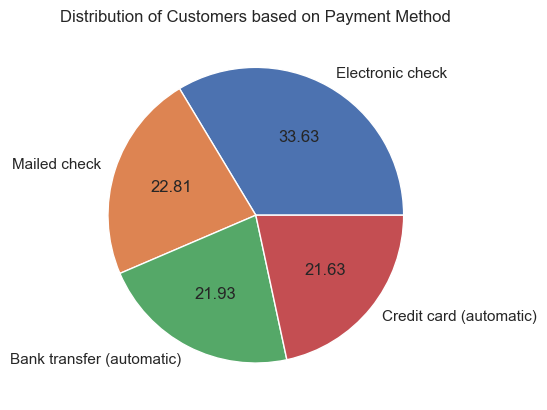

In [20]:
plt.pie(x=customer_churn['PaymentMethod'].value_counts().values,labels=customer_churn['PaymentMethod'].value_counts().index, autopct='%.2f')
plt.title('Distribution of Customers based on Payment Method')
plt.show()

-> Around 33.63% customers pay through Electronic Check. Other Payment Methods is almost equally used.

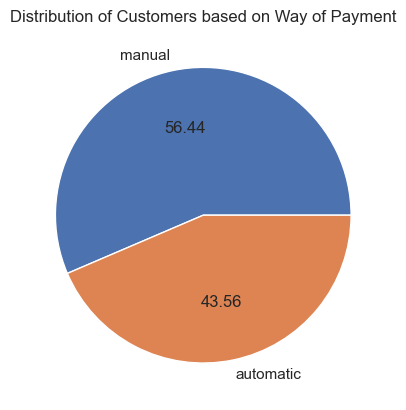

In [21]:
plt.pie(x=customer_churn['Automatic'].value_counts().values,labels=customer_churn['Automatic'].value_counts().index, autopct='%.2f')
plt.title('Distribution of Customers based on Way of Payment')
plt.show()

-> 56.44% use manual way of payment, i.e., Electronic Check and Mail Check. While the remaining 43.56% use automatic payment method, i.e., Bank Transfer and Credit Card.

# Bivariate Analysis

In [22]:
pd.crosstab(customer_churn['Churn'],customer_churn['StreamingTV'],margins=True,normalize=True) * 100

StreamingTV,No,Yes,All
Churn,,,
No,46.558589,26.862912,73.421502
Yes,15.002844,11.575654,26.578498
All,61.561433,38.438567,100.000000


-> 46.5% customers does not use StreamingTV and has not churned.

-> 15% of customers who does not use StreamingTV has churned.

-> 26.86% of StreamingTV users have not churned while 11.57% have.

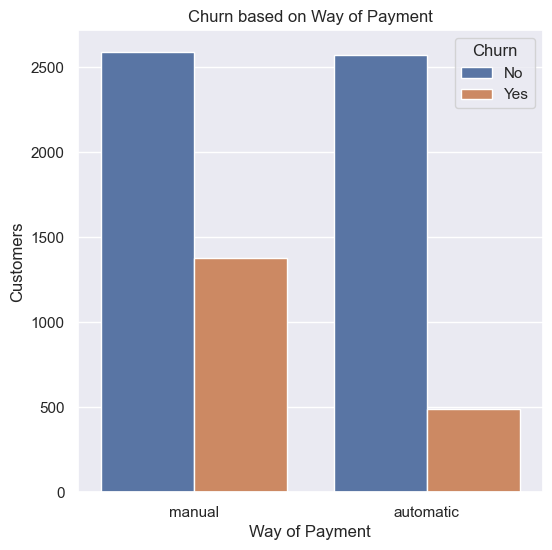

In [23]:
plt.figure(figsize=(6,6))
sns.countplot(x='Automatic',data=customer_churn,hue='Churn')
plt.ylabel('Customers')
plt.xlabel('Way of Payment')
plt.title('Churn based on Way of Payment')
plt.show()

The ratio of churned: not churned is more in manual. Hence customers with manual way of payment are more likely to churn.

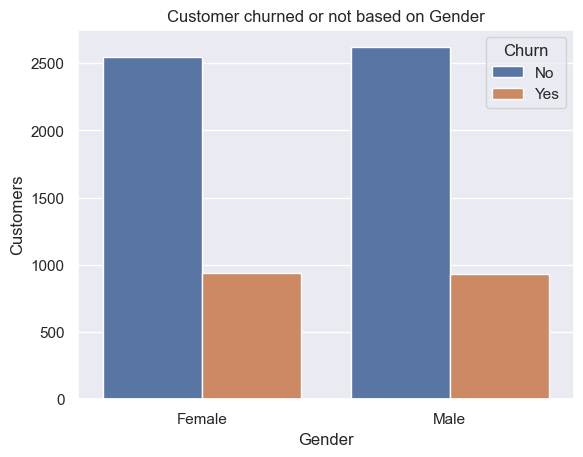

In [24]:
sns.countplot(data=customer_churn,x='gender',hue='Churn')
plt.xlabel('Gender')
plt.ylabel('Customers')
plt.title('Customer churned or not based on Gender')
plt.show()

-> Churn in Female Customers is almost equal to churn in male customers. So we can assume churn is independent of Gender.

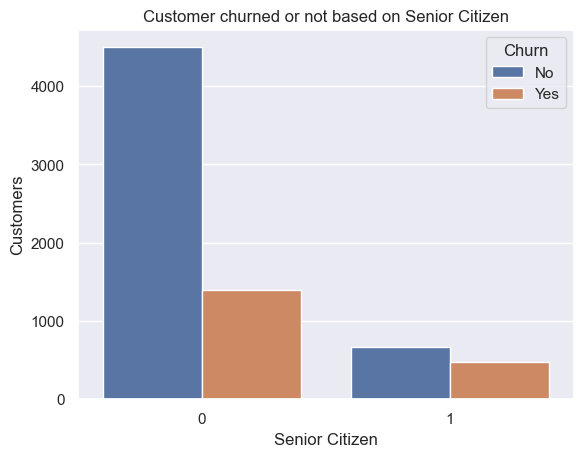

In [25]:
sns.countplot(data=customer_churn,x='SeniorCitizen',hue='Churn')
plt.xlabel('Senior Citizen')
plt.ylabel('Customers')
plt.title('Customer churned or not based on Senior Citizen')
plt.show()

The ratio of churn in senior citizen(1) is high as compared to non senior citizen. Has Senior citizens are more likely to churn.

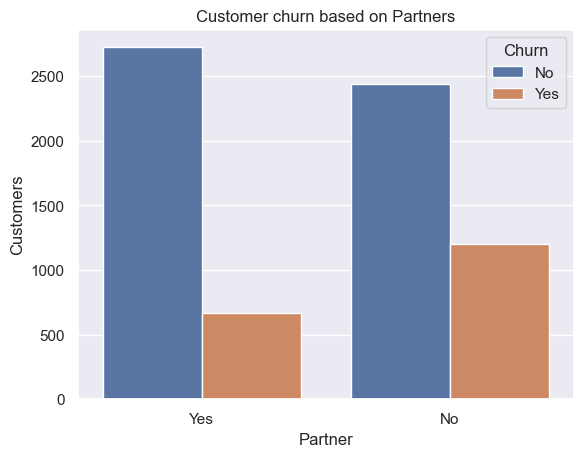

In [26]:
sns.countplot(data=customer_churn,x='Partner',hue='Churn')
plt.xlabel('Partner')
plt.ylabel('Customers')
plt.title('Customer churn based on Partners')
plt.show()

Since the ratio is higher when the customer do not have a partner, customers with no partners are more likely to churn.

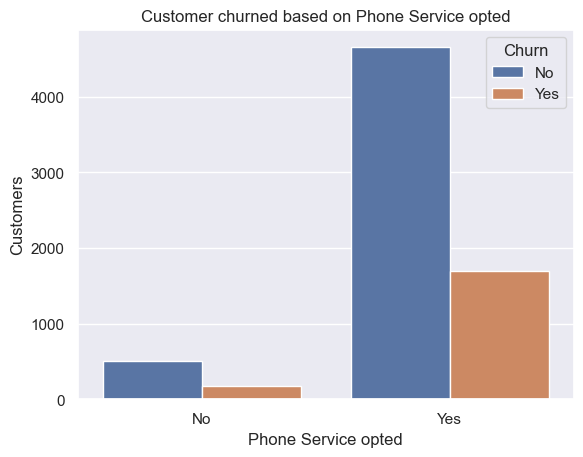

In [27]:
sns.countplot(data=customer_churn,x='PhoneService',hue='Churn')
plt.xlabel('Phone Service opted')
plt.ylabel('Customers')
plt.title('Customer churned based on Phone Service opted')
plt.show()

Customers with phone services are more likely to churn.

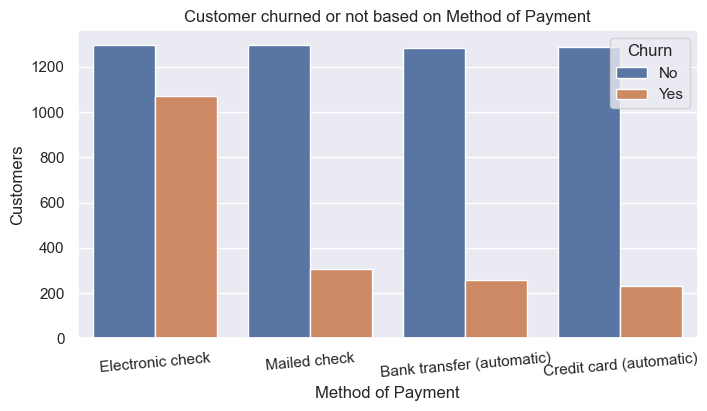

In [28]:
plt.figure(figsize=(8,4))
sns.countplot(data=customer_churn,x='PaymentMethod',hue='Churn')
plt.xlabel('Method of Payment')
plt.xticks(rotation=5)
plt.ylabel('Customers')
plt.title('Customer churned or not based on Method of Payment')
plt.show()

Customers who pay through Electronic check are most likely to churn.

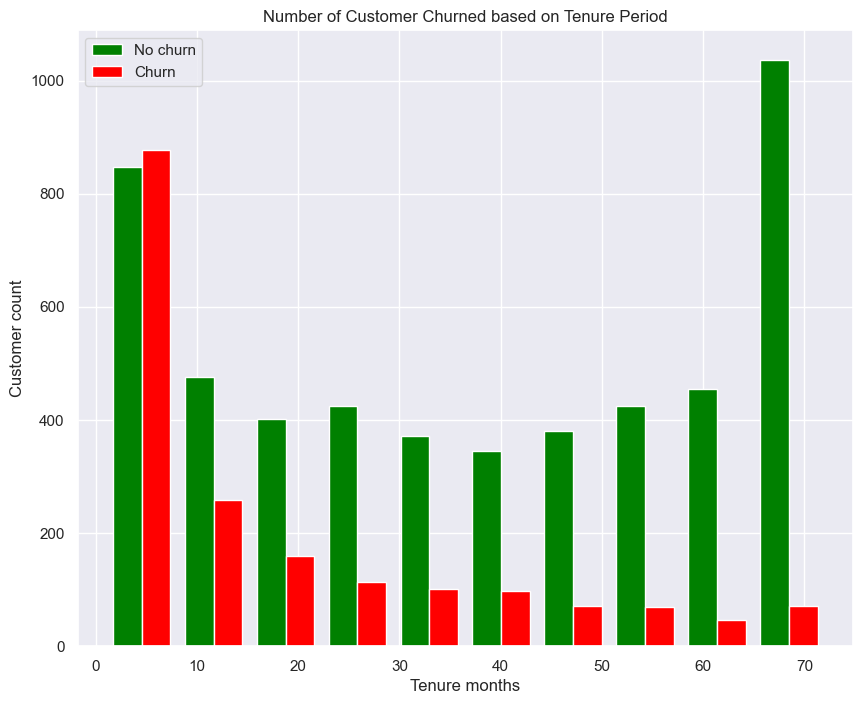

In [29]:
tenure_churn_no = customer_churn[customer_churn['Churn'] == 'No']['tenure']
tenure_churn_yes = customer_churn[customer_churn['Churn'] == 'Yes']['tenure']

plt.figure(figsize=(10,8))
plt.hist([tenure_churn_no,tenure_churn_yes],color=['green','red'],label=['No churn','Churn'])
plt.xlabel('Tenure months')
plt.ylabel('Customer count')
plt.title('Number of Customer Churned based on Tenure Period')
plt.legend()
plt.show()

As tenure period increases, customer churning decreases.

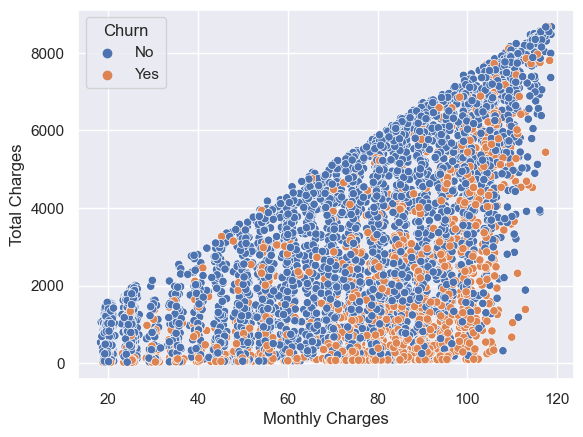

In [56]:
sns.scatterplot(x='MonthlyCharges',y='TotalCharges',hue='Churn',data=customer_churn)
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.show()

As Monthly charges increases, total charges also increases.

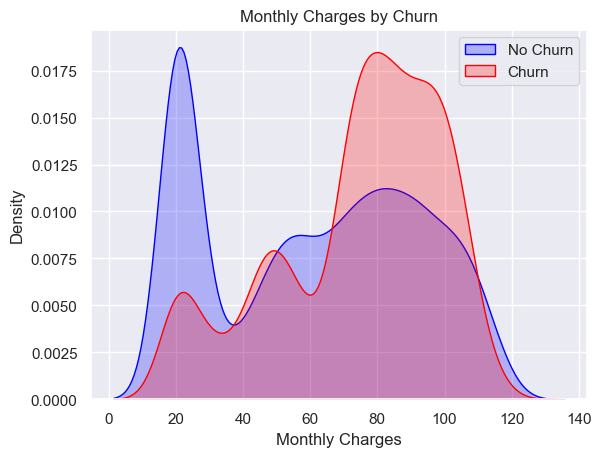

In [31]:
monthly_charges = sns.kdeplot(customer_churn.MonthlyCharges[(customer_churn['Churn'] == 'No')],color="Blue",shade=True)
monthly_charges = sns.kdeplot(customer_churn.MonthlyCharges[(customer_churn['Churn']=='Yes')],ax=monthly_charges,color="Red",shade=True)
monthly_charges.legend(["No Churn","Churn"],loc="upper right")
monthly_charges.set_ylabel('Density')
monthly_charges.set_xlabel('Monthly Charges')
monthly_charges.set_title('Monthly Charges by Churn')
plt.show()

Customers at low monthly charges are less likely to churn. As monthly charges increases, customer churning increases.

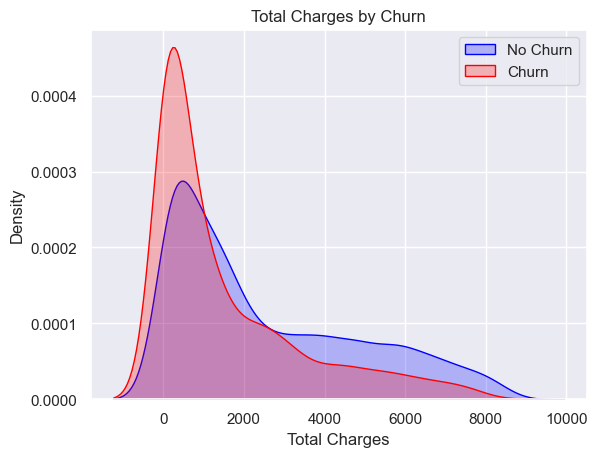

In [32]:
total_charges = sns.kdeplot(customer_churn.TotalCharges[(customer_churn['Churn'] == 'No')],color="Blue",shade=True)
total_charges = sns.kdeplot(customer_churn.TotalCharges[(customer_churn['Churn']=='Yes')],ax=total_charges,color="Red",shade=True)
total_charges.legend(["No Churn","Churn"],loc="upper right")
total_charges.set_ylabel('Density')
total_charges.set_xlabel('Total Charges')
total_charges.set_title('Total Charges by Churn')
plt.show()

Astonishingly, people with high total charges are less less likely to churn.

If we combine the insights from the Tenure period, monthly charges and total charges, then the picture get clearer. Low tenure period and high monthly charges lead to low total charges. Since the churn is high at the former two, it is aslo high at low total charges.

In [33]:
df = customer_churn.copy()
df['Churn'] = np.where(df['Churn'] == 'Yes',1,0)
df_dummies = pd.get_dummies(df)

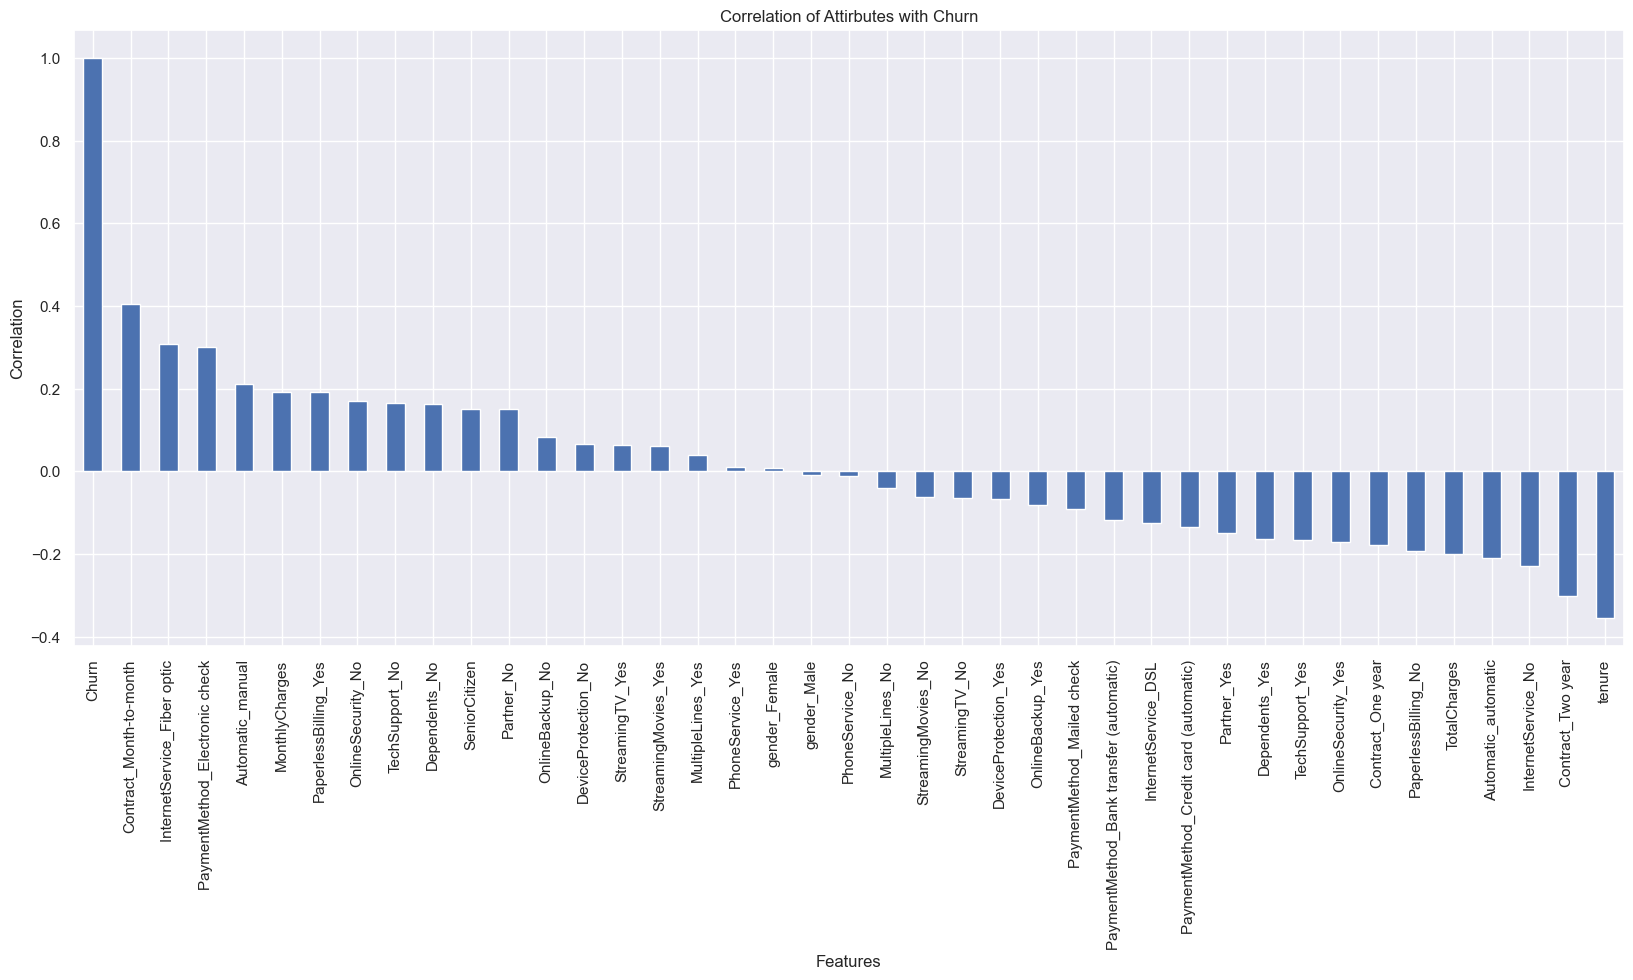

In [34]:
plt.figure(figsize=(20,8))
df_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.title('Correlation of Attirbutes with Churn')
plt.show()

-> Gender does not have much correlation with churn rate.

-> Tenure period, contract two-year have high negative correlation with tenure.

-> Contract month-to-month, online security_no,techsupport_no have high positive correlation with churn.

# Multivariate Analysis

In [39]:
churned_df = customer_churn[customer_churn.Churn == 'Yes']
nochurned_df = customer_churn[customer_churn.Churn == 'No']

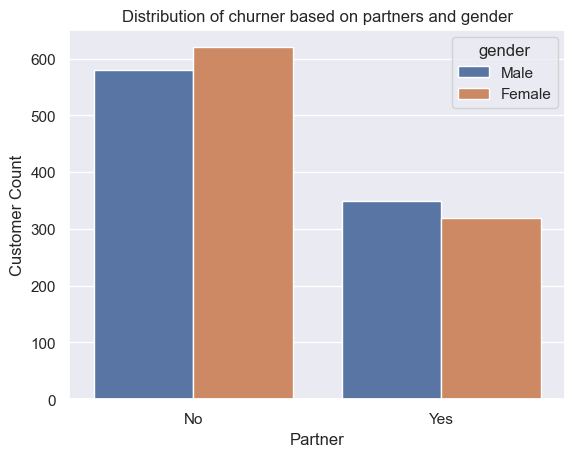

In [40]:
sns.countplot(data=churned_df,x='Partner',hue='gender')
plt.ylabel('Customer Count')
plt.title('Distribution of churner based on partners and gender')
plt.show()

-> Customers without partners are more likely to churn.

->Female without partners are less likely to churn compared to female with partners. But for male, it is opposite.

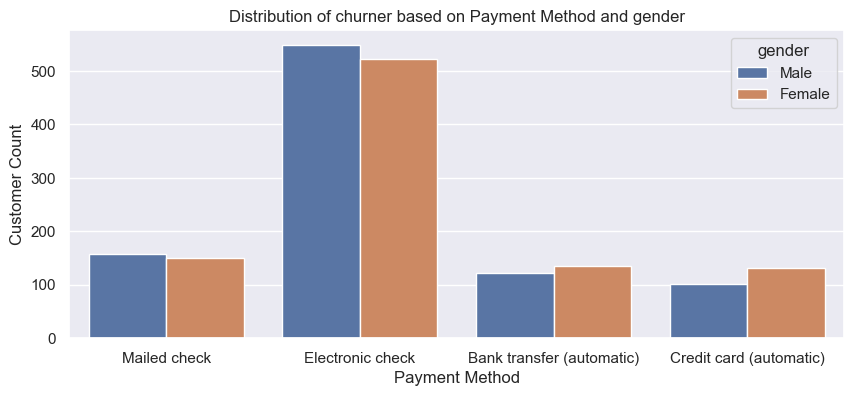

In [41]:
plt.figure(figsize=(10,4))
sns.countplot(data=churned_df,x='PaymentMethod',hue='gender')
plt.xlabel('Payment Method')
plt.ylabel('Customer Count')
plt.title('Distribution of churner based on Payment Method and gender')
plt.show()

-> Churner are heighest when the payment method used is Electronic check.

-> Automatic payment methods(Bank Transfer and Credit Card) shows less number of churners.

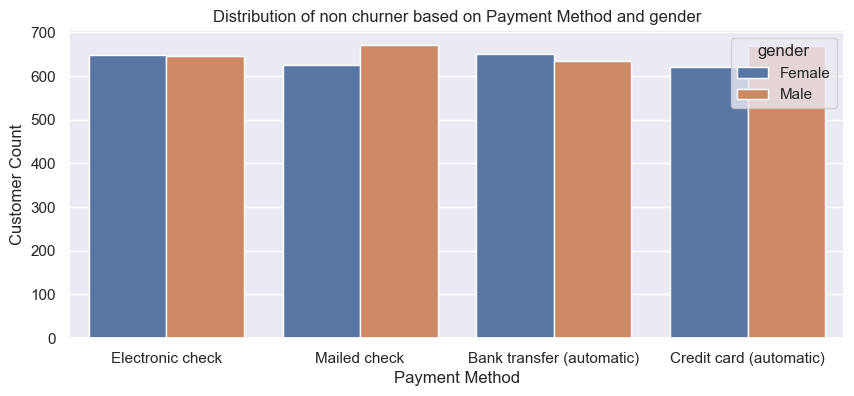

In [42]:
plt.figure(figsize=(10,4))
sns.countplot(data=nochurned_df,x='PaymentMethod',hue='gender')
plt.xlabel('Payment Method')
plt.ylabel('Customer Count')
plt.title('Distribution of non churner based on Payment Method and gender')
plt.show()

-> Non churners have same distribution based on Payment method used.

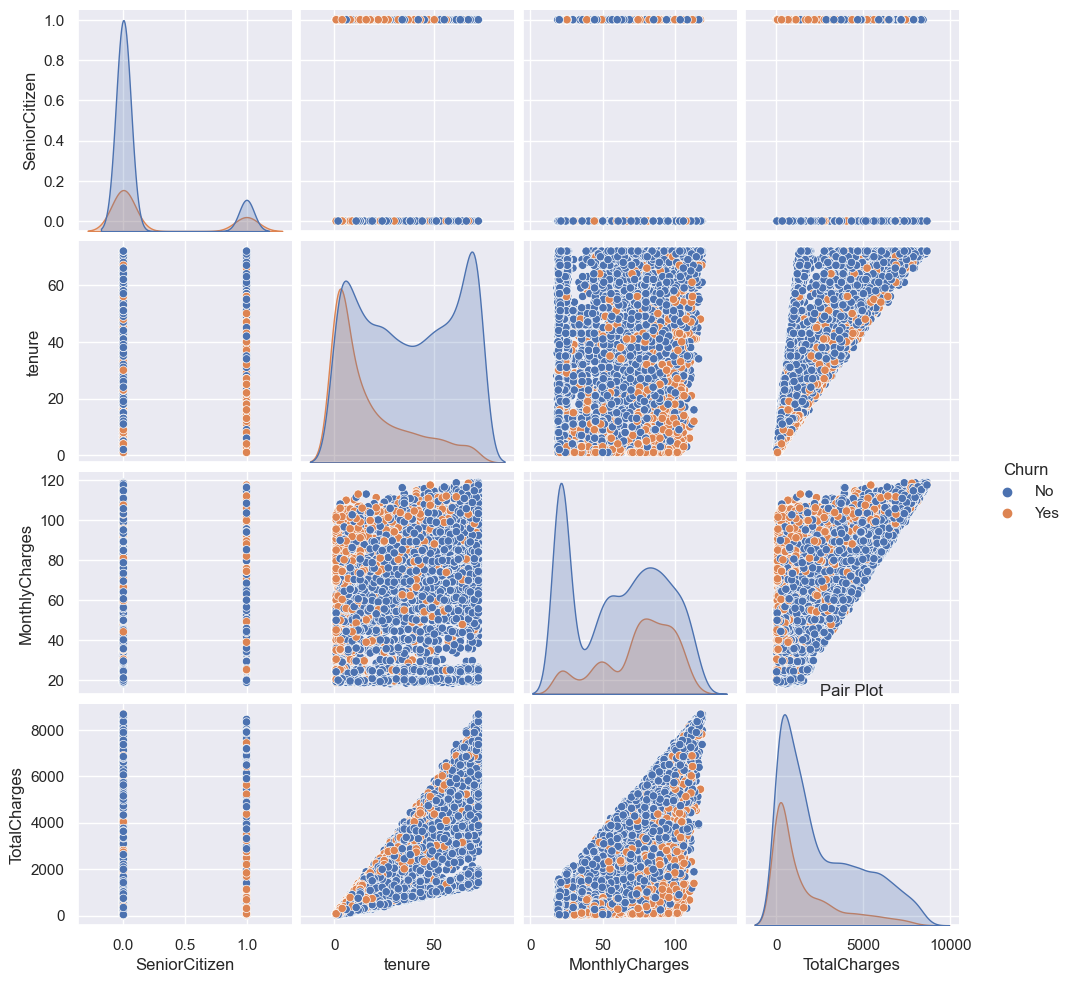

In [71]:
sns.pairplot(data=customer_churn, hue='Churn')
plt.title('Pair Plot')
plt.show()

# Plot using t-sne

In [59]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

In [60]:
columns = ['tenure','MonthlyCharges','TotalCharges']
scaler = MinMaxScaler()
df_dummies[columns] = scaler.fit_transform(df_dummies[columns])

In [69]:
data = df_dummies.drop('Churn',axis=1)
labels = df_dummies['Churn']

model = TSNE(n_components=2,perplexity=100,n_iter=500,random_state=42,learning_rate='auto')

tsne_data = model.fit_transform(data)

tsne_data = np.vstack((tsne_data.T,labels)).T
tsne_df = pd.DataFrame(data=tsne_data,columns=("Dim_1","Dim_2",'labels'))

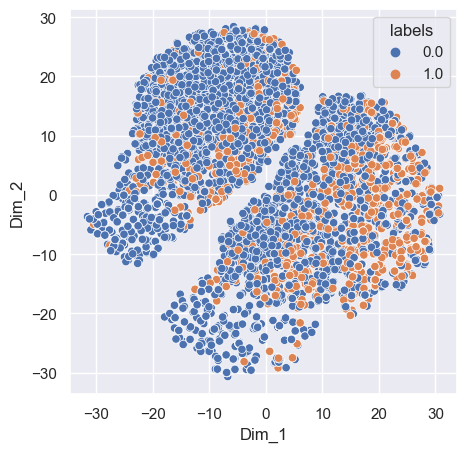

In [70]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=tsne_df,x='Dim_1',y='Dim_2',hue='labels',palette='deep')
plt.show()

# Applying Statistical tests

## Chi-Squared Test

### 1) For Churn and Gender

Null Hypothesis:

                H0: There is no relation between customer churned and customers' gender,i.e, customer churn is independent of customer gender.

In [43]:
gender_contingency = pd.crosstab(customer_churn['Churn'],customer_churn['gender'])
gender_contingency

gender,Female,Male
Churn,,
No,2544,2619
Yes,939,930


In [44]:
chi2_stat, p_value, dof, expected = st.chi2_contingency(gender_contingency)
print('Chi-Square statistic value:',chi2_stat)
print('P-value:',p_value)
print('Degree Of Freedom:', dof)
print('Expected Values:\n',expected)

Chi-Square statistic value: 0.47545453727386294
P-value: 0.4904884707065509
Degree Of Freedom: 1
Expected Values:
 [[2557.27090444 2605.72909556]
 [ 925.72909556  943.27090444]]


Since p-value > 0.05, we accept the null hypothesis at 1 degree of freedom with 5% level of significance.

Therefore, customer churned is independent of customers' gender.

### 2) For Payment Method and gender

Null Hypothesis:

                H0: There is no relation between payment methods and customers' gender,i.e, payment method is independent of customer gender.

In [45]:
paymentmethod_contingency = pd.crosstab(customer_churn['PaymentMethod'],customer_churn['gender'])
paymentmethod_contingency

gender,Female,Male
PaymentMethod,,
Bank transfer (automatic),787,755
Credit card (automatic),751,770
Electronic check,1170,1195
Mailed check,775,829


In [46]:
chi2_stat,p_value,dof,expected = st.chi2_contingency(paymentmethod_contingency)
print('Chi-Square statistic value:',chi2_stat)
print('P-value:',p_value)
print('Degree Of Freedom:', dof)
print('Expected Values:\n',expected)

Chi-Square statistic value: 2.3643965674751892
P-value: 0.5002965979566683
Degree Of Freedom: 3
Expected Values:
 [[ 763.76365188  778.23634812]
 [ 753.36220137  767.63779863]
 [1171.40145051 1193.59854949]
 [ 794.47269625  809.52730375]]


Since p-value > 0.05, we accept the null hypothesis at 3 degree of freedom with 5% level of significance.

Therefore, payment method is independent of customers' gender.

### 3) For Contract Month-to-Month and Churn

Null Hypothesis:

                H0: There is no relation between customer churned and contract Month-to-Month,i.e, customer churn is independent of Contract Month-to-Month.

In [47]:
contract_month_to_month = pd.crosstab(df_dummies['Churn'],df_dummies['Contract_Month-to-month'])
contract_month_to_month

Contract_Month-to-month,0,1
Churn,,
0,2943,2220
1,214,1655


In [48]:
chi2_stat,p_value,dof,expected = st.chi2_contingency(contract_month_to_month)
print('Chi-Square statistic value:',chi2_stat)
print('P-value:',p_value)
print('Degree Of Freedom:', dof)
print('Expected Values:\n',expected)

Chi-Square statistic value: 1149.1043152026427
P-value: 7.023467851331667e-252
Degree Of Freedom: 1
Expected Values:
 [[2317.91680887 2845.08319113]
 [ 839.08319113 1029.91680887]]


Since p-value < 0.05, we refute the null hypothesis at 1 degree of freedom with 5% level of significance.

Therefore, there is some relationship between customer churned and Contract Month-to-Month.

### 4) For Way of payment and Churn

Null Hypothesis:

                H0: There is no relation between customer churned and way of payment(automatic or manual),i.e, customer churn is independent of way of paument.

In [54]:
automatic_contingency = pd.crosstab(customer_churn['Churn'],customer_churn['Automatic'])
automatic_contingency

Automatic,automatic,manual
Churn,,
No,2573,2590
Yes,490,1379


In [55]:
chi2_stat,p_value,dof,expected = st.chi2_contingency(automatic_contingency)
print('Chi-Square statistic value:',chi2_stat)
print('P-value:',p_value)
print('Degree Of Freedom:', dof)
print('Expected Values:\n',expected)

Chi-Square statistic value: 310.393406178697
P-value: 1.7927675256826593e-69
Degree Of Freedom: 1
Expected Values:
 [[2248.90059727 2914.09940273]
 [ 814.09940273 1054.90059727]]


Since p-value < 0.05, we refute the null hypothesis at 1 degree of freedom with 5% level of significance.

Therefore, there is some relationship between customer churned and way of payment(automatic or manual).